In [1]:
import os
import sys
sys.path.append("../") # go to parent dir
import glob
import time
import logging
import numpy as np
from scipy.sparse import linalg as spla
import matplotlib.pyplot as plt
import logging
from mpl_toolkits import mplot3d
from dedalus.tools.config import config
from simple_sphere import SimpleSphere, TensorField, TensorSystem
import equations
import pickle as pkl
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

#add path to data folder
input_folder = "/Volumes/ExtDrive/data"
output_folder = "plots"
dpi=300

first_frame = 1
last_frame = 5000

sphere_list = ['sphere115', 'sphere110', 'sphere118']

f1 = "%s/%s" % (input_folder, sphere_list[0])
f2 = "%s/%s" % (input_folder, sphere_list[1])
f3 = "%s/%s" %(input_folder, sphere_list[2])

fs = [f1, f2, f3]
#om_list = [np.zeros((last_frame-first_frame+1, 512, 256)) for i in range(3)]
#coeffs_list = [np.zeros((last_frame-first_frame+1, 256, 256), dtype=complex) for i in range(3)]
            

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

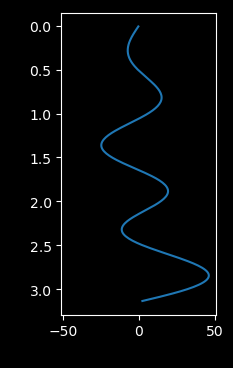

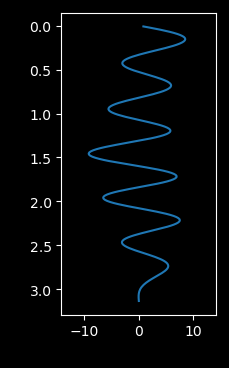

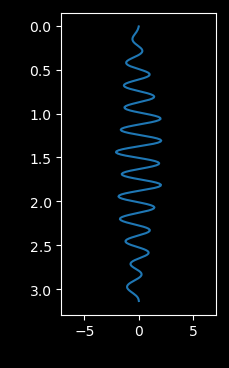

In [36]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'})

ind = 3000

fig1 = plt.figure(1)
fig2 = plt.figure(2)

for i in range(3):
    with np.load("%s/output_%i.npz" %(fs[i], ind)) as file:

        vph = file['v_ph']
        vth = file['v_th']
        om = file['om']
        phi = file['phi']
        theta = file['theta']
    
    plt.figure(figsize=(2,4), dpi=100)
    plt.plot(np.mean(vph, axis=0), theta)
    plt.xlabel('Zonal velocity')
    plt.ylabel(r'$\theta$', usetex=True)
    plt.gca().invert_yaxis()
    plt.xlim([-np.max(np.abs(np.mean(vph,axis=0)))-5, np.max(np.abs(np.mean(vph,axis=0)))+5])
    plt.savefig('../plots/zonal_%s.pdf' %(sphere_list[i]), bbox_inches='tight')
   
        

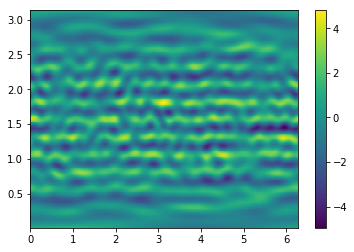

In [18]:
plt.pcolormesh(phi, theta, vph.T)
plt.colorbar()

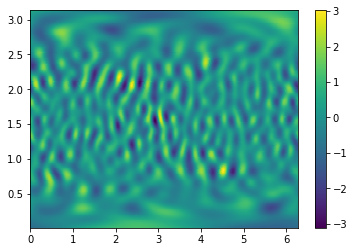

In [17]:
plt.pcolormesh(phi, theta, vth.T)
plt.colorbar()